In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [7]:
row_data = pd.read_csv('/content/1.03.+Dummies (1).csv')

In [8]:
row_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [9]:
row_data.describe(include='all')

,SAT,GPA,Attendance
count,84.000000,84.000000,84
unique,NaN,NaN,2
top,NaN,NaN,No
freq,NaN,NaN,45
mean,1845.273810,3.330238,NaN
std,104.530661,0.271617,NaN
min,1634.000000,2.400000,NaN
25%,1772.000000,3.190000,NaN
50%,1846.000000,3.380000,NaN
75%,1934.000000,3.502500,NaN


In [10]:
data = row_data.copy()

In [11]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [12]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [13]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [14]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [19]:
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           2.19e-15
Time:                        03:15:34   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

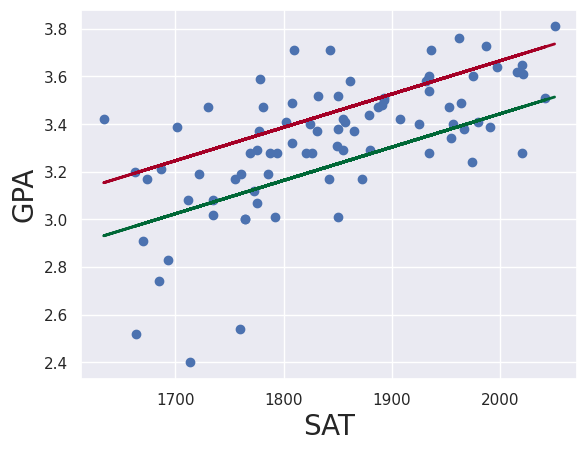

In [20]:
plt.scatter(data['SAT'],y)

yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

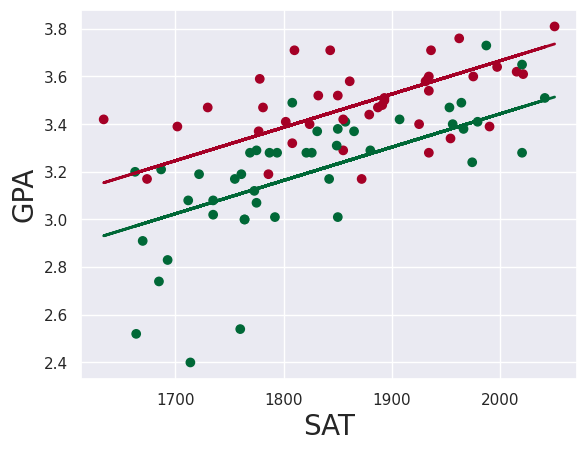

In [21]:
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

yhat_no = 0.6439 + 0.0014*data['SAT']

fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [22]:
raw_real_data = pd.read_csv('/content/real_estate_price_size_year_view (1).csv')

In [23]:
raw_real_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [24]:
real_data = raw_real_data.copy()

In [25]:
real_data['view'] = real_data['view'].map({'Sea view': 1, 'No sea view': 0})

In [26]:
real_data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [28]:
y = real_data['price']
x1 = real_data[['size', 'year', 'view']]

In [29]:
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.02e-50
Time:                        03:29:01   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
x.head()

,const,size,year,view
0,1.0,643.09,2015,0
1,1.0,656.22,2009,0
2,1.0,487.29,2018,1
3,1.0,1504.75,2015,0
4,1.0,1275.46,2009,1


In [37]:
new_data = pd.DataFrame({'const':1, 'size':[643, 656.22,487.29],
                         'year': [2015, 2009, 2018],
                         'view': [0, 0, 1]})
new_data = new_data[['const', 'size', 'year', 'view']]
new_data

,const,size,year,view
0,1,643.00,2015,0
1,1,656.22,2009,0
2,1,487.29,2018,1


In [38]:
preidiction = result.predict(new_data)

In [39]:
preidiction

0    224177.160343
1    210811.945021
2    254331.773344
dtype: float64

In [40]:
x['Price'] = result.predict(x)

In [42]:
x.head()

,const,size,year,view,Price
0,1.0,643.09,2015,0,224197.233189
1,1.0,656.22,2009,0,210811.945021
2,1.0,487.29,2018,1,254331.773344
3,1.0,1504.75,2015,0,416374.658398
4,1.0,1275.46,2009,1,405648.064843
